Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read Data

In [2]:
file = pd.ExcelFile("../../../../data/final/Handball_09.03.2023_fertig.xlsx")

file.sheet_names

df = file.parse('2. League')

# drop last col comments & favorite corner & empy rows at end
df = df.iloc[:, :-1]
df.columns


Index(['Home team', 'Guest team', 'Matchday', 'Player 3rd league',
       'Shooter team', 'Game Minute',
       'Difference between\nfinal whistle and kickoff \n(in seconds)',
       'Home Goal', 'Guest Goal',
       'Goalkeeper position\n(0 = on the line;\n 1 = in front of the line)',
       'Goalkeeper name', 'Goalkeeper Club', 'Goalkeeper \nheight (cm)',
       'Thrower \nheight (cm)',
       'Toss successful?\n(0 = no; 1 = yes;\n 2 = yes, afterthrow',
       'Left/right \nhanded?\n(1 = right; 2 = left)', 'Throw direction',
       'Pressure situation?\n(0 = no; \n1= Goalkeeper change;\n2 = last 7 meter held; 3 = goal difference < 4 + from 50. minute; 4 = 1+2; 5 = 1+3; 6 = 2+3; 7 = 1+2+3; 8 = last 7 meter successful in follow-up throw\n',
       'Number of seven meters\n(of the player)',
       'Throw quadrant last 7 meter',
       'last 7 meter successful?\n(0 = no; 1 = yes; \n2 = yes, in the afterthrow'],
      dtype='object')

Cleanup & Renaming

In [3]:
df.replace('unklar', np.nan,inplace=True)
df.replace('unklar ', np.nan,inplace=True)
df.replace('fehlend', np.nan,inplace=True)
df.replace('-', np.nan,inplace=True)
df.replace(-99, np.nan,inplace=True)
df.replace('-99', np.nan,inplace=True)
#df.dropna(inplace=True)
df.columns = [ 'homeTeam','opponentTeam','day','name','team','playTime',
              'whistleThrowTime','homeGoals','opponentGoals',
              'goalKeeperPosition','goalKeeperName', 
              'goalkeeperTeam','goalKeeperHeightCM','shooterheightCM',
              'throwSuccess','LRHandy','throwDirection',
              'pressureSituation','noOfThrowsFromPlayer',
              'throwQuadrantLastThrow','lastThrowSuccess']
df = df.astype({'homeTeam':'string', 'opponentTeam':'string','day':'float16','name':'string','team':'string','playTime':'float16',
              'whistleThrowTime':'float16','homeGoals':'float16','opponentGoals':'float16','goalKeeperPosition':'float16',
              'goalKeeperName':'string','goalkeeperTeam':'string', 'goalKeeperHeightCM':'float16','shooterheightCM':'float16',
              'throwSuccess':'float16','LRHandy':'float16','throwDirection':'float16','pressureSituation':'float16','noOfThrowsFromPlayer':'float16',
              'throwQuadrantLastThrow':'float16','lastThrowSuccess':'float16', })
df

,homeTeam,opponentTeam,day,name,team,playTime,whistleThrowTime,homeGoals,opponentGoals,goalKeeperPosition,...,goalkeeperTeam,goalKeeperHeightCM,shooterheightCM,throwSuccess,LRHandy,throwDirection,pressureSituation,noOfThrowsFromPlayer,throwQuadrantLastThrow,lastThrowSuccess
0,EHV Aue,TUSEM Essen,1.0,NBS,TUSEM Essen,10.0,NaN,5.0,3.0,NaN,...,EHV Aue,192.0,180.0,1.0,1.0,3.0,0.0,1.0,NaN,NaN
1,EHV Aue,TUSEM Essen,1.0,NBS,TUSEM Essen,15.0,NaN,8.0,4.0,NaN,...,EHV Aue,192.0,180.0,1.0,1.0,9.0,0.0,2.0,3.0,1.0
2,EHV Aue,TUSEM Essen,1.0,NBS,TUSEM Essen,34.0,NaN,15.0,14.0,NaN,...,EHV Aue,185.0,180.0,0.0,1.0,2.0,0.0,3.0,9.0,1.0
3,EHV Aue,TUSEM Essen,1.0,NBS,TUSEM Essen,39.0,NaN,18.0,17.0,NaN,...,EHV Aue,185.0,180.0,1.0,1.0,8.0,2.0,4.0,2.0,2.0
4,EHV Aue,TUSEM Essen,1.0,NBS,TUSEM Essen,43.0,NaN,19.0,19.0,NaN,...,EHV Aue,185.0,180.0,1.0,1.0,7.0,0.0,5.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,VfL Lübeck-Schwartau,TV Emsdetten,7.0,DHSGT,TV Emsdetten,22.0,35.0,7.0,7.0,1.0,...,VfL Lübeck-Schwartau,210.0,180.0,1.0,1.0,3.0,0.0,3.0,8.0,1.0
223,VfL Lübeck-Schwartau,TV Emsdetten,7.0,DHSGT,TV Emsdetten,36.0,28.0,14.0,12.0,1.0,...,VfL Lübeck-Schwartau,195.0,180.0,0.0,1.0,2.0,1.0,4.0,3.0,1.0
224,VfL Lübeck-Schwartau,TV Emsdetten,7.0,DHSGT,TV Emsdetten,39.0,26.0,15.0,14.0,1.0,...,VfL Lübeck-Schwartau,195.0,180.0,1.0,1.0,9.0,4.0,5.0,2.0,0.0
225,VfL Lübeck-Schwartau,TV Emsdetten,7.0,DHSGT,TV Emsdetten,50.0,97.0,21.0,17.0,1.0,...,VfL Lübeck-Schwartau,210.0,180.0,1.0,1.0,6.0,3.0,6.0,9.0,1.0


In [4]:
df = df.loc[:,('name','throwDirection','throwSuccess')].copy()
df.dropna(inplace=True)
df['throwSuccess'].replace(2.0, 1.0,inplace=True)

#df1 =pd.crosstab(df['name'], df['throwDirection'], margins=True, margins_name="Total") 
df1 =pd.crosstab(df['name'], df['throwDirection'],) 
df1

throwDirection,1.0,2.0,3.0,4.0,6.0,7.0,8.0,9.0
name,,,,,,,,
DHSGT,1,2,1,0,1,0,1,3
FHGB,6,5,3,2,1,21,6,33
NBS,8,3,15,5,5,13,19,26


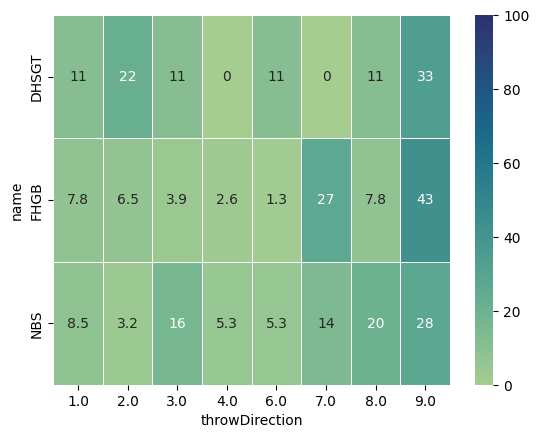

In [5]:
ax = sns.heatmap(pd.crosstab(df['name'], df['throwDirection'], normalize='index')*100, linewidth=0.5, annot=True, cmap="crest",vmin=0,vmax=100)
#ax.xaxis.tick_top()
plt.show()

In [6]:
df2 =pd.crosstab(df['name'], df['throwSuccess']) 
df2

throwSuccess,0.0,1.0
name,,
DHSGT,3,6
FHGB,13,64
NBS,15,79


In [7]:
df3 = pd.crosstab([df['name'],df['throwDirection']], df['throwSuccess']) 
pd.set_option("display.max_rows", None, "display.max_columns", None)
df3

throwSuccess          0.0  1.0
name  throwDirection          
DHSGT 1.0               1    0
      2.0               1    1
      3.0               0    1
      6.0               0    1
      8.0               0    1
      9.0               1    2
FHGB  1.0               0    6
      2.0               2    3
      3.0               0    3
      4.0               0    2
      6.0               0    1
      7.0               4   17
      8.0               0    6
      9.0               7   26
NBS   1.0               0    8
      2.0               1    2
      3.0               3   12
      4.0               1    4
      6.0               1    4
      7.0               1   12
      8.0               3   16
      9.0               5   21

In [8]:
df3 = pd.crosstab([df['name'],df['throwDirection']], df['throwSuccess']) 
pd.set_option("display.max_rows", None, "display.max_columns", None)
df3

throwSuccess          0.0  1.0
name  throwDirection          
DHSGT 1.0               1    0
      2.0               1    1
      3.0               0    1
      6.0               0    1
      8.0               0    1
      9.0               1    2
FHGB  1.0               0    6
      2.0               2    3
      3.0               0    3
      4.0               0    2
      6.0               0    1
      7.0               4   17
      8.0               0    6
      9.0               7   26
NBS   1.0               0    8
      2.0               1    2
      3.0               3   12
      4.0               1    4
      6.0               1    4
      7.0               1   12
      8.0               3   16
      9.0               5   21

Playerwise Successfull Throw

In [9]:
dfs = df.loc[df['throwSuccess'] == 1]
dfs
dfscs =pd.crosstab(dfs['name'], dfs['throwDirection'], margins=True, margins_name="Total") 
dfscs

throwDirection,1.0,2.0,3.0,4.0,6.0,7.0,8.0,9.0,Total
name,,,,,,,,,
DHSGT,0,1,1,0,1,0,1,2,6
FHGB,6,3,3,2,1,17,6,26,64
NBS,8,2,12,4,4,12,16,21,79
Total,14,6,16,6,6,29,23,49,149


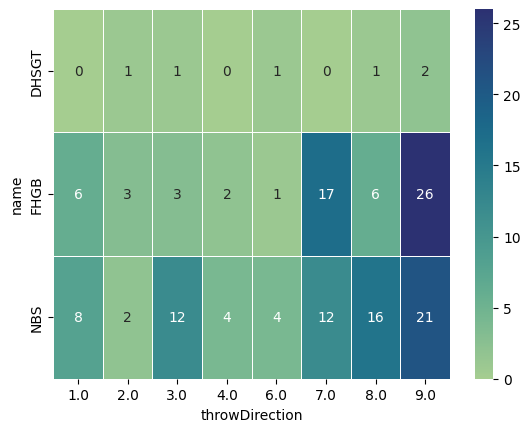

In [10]:
axs = sns.heatmap(pd.crosstab(dfs['name'], dfs['throwDirection']), linewidth=0.5, annot=True, cmap="crest")
#ax.xaxis.tick_top()
plt.show()

Playerwise Failed Throws

In [11]:
dff = df.loc[df['throwSuccess'] == 0]
dff
dffcs =pd.crosstab(dff['name'], dff['throwDirection'], margins=True, margins_name="Total") 
dffcs

throwDirection,1.0,2.0,3.0,4.0,6.0,7.0,8.0,9.0,Total
name,,,,,,,,,
DHSGT,1,1,0,0,0,0,0,1,3
FHGB,0,2,0,0,0,4,0,7,13
NBS,0,1,3,1,1,1,3,5,15
Total,1,4,3,1,1,5,3,13,31


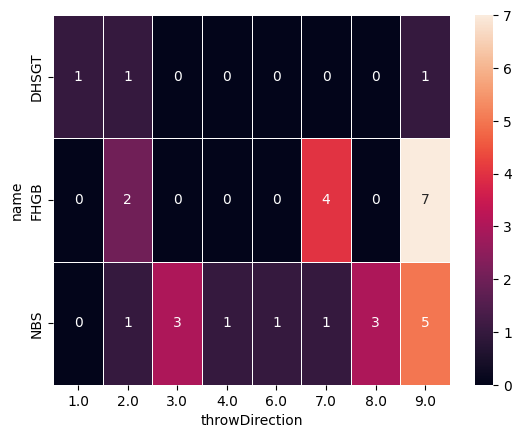

In [12]:
axf = sns.heatmap(pd.crosstab(dff['name'], dff['throwDirection']), linewidth=0.5, annot=True)
#ax.xaxis.tick_top()
plt.show()

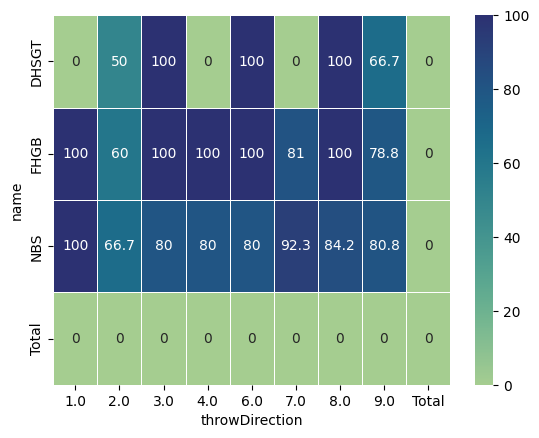

throwDirection,1.0,2.0,3.0,4.0,6.0,7.0,8.0,9.0,Total
name,,,,,,,,,
DHSGT,0.0,50.000000,100.0,0.0,100.0,0.000000,100.000000,66.666667,0.0
FHGB,100.0,60.000000,100.0,100.0,100.0,80.952381,100.000000,78.787879,0.0
NBS,100.0,66.666667,80.0,80.0,80.0,92.307692,84.210526,80.769231,0.0
Total,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0


In [13]:
relSuccess = dfscs/df1*100
relSuccess.apply(np.floor)
relSuccess.replace(np.nan,0,inplace=True)
axrs = sns.heatmap(relSuccess, linewidth=0.5, annot=True, cmap="crest",fmt='.3g')
#ax.xaxis.tick_top()
plt.show()
relSuccess